<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Scratch-space-for-alternative-figures" data-toc-modified-id="Scratch-space-for-alternative-figures-1">Scratch space for alternative figures</a></span><ul class="toc-item"><li><span><a href="#Empirical-Trees" data-toc-modified-id="Empirical-Trees-1.1">Empirical Trees</a></span></li><li><span><a href="#Compete" data-toc-modified-id="Compete-1.2">Compete</a></span></li><li><span><a href="#Compete-(3)" data-toc-modified-id="Compete-(3)-1.3">Compete (3)</a></span></li></ul></li></ul></div>

# Scratch space for alternative figures

In [1]:
library(ggplot2)
library(cowplot)
require(ggseqlogo)
library(ggtree)
library(grid)
library(gridExtra)
library(dplyr)

black = "black"
blue = "#439FC3"
green = "#76A88D"
orange = "#F9842A"
red = "#B52A24"
pink = "#CC79A7"
purple = "#8E7790"

small_color = '#f76ab4'
nucleophilic_color = '#ff7f00'
hydrophobic_color = '#12ab0d'
aromatic_color = '#84380b'
acidic_color = '#3c58e5'
amide_color = '#972aa8'
basic_color = '#e41a1c'
functionalGroup = make_col_scheme(chars=c('G', 'A', 'S', 'T', 'C', 'V', 'L', 'I', 'M', 'P', 'F', 'Y', 'W', 'D', 'E', 'H', 'K', 'R', 'N', 'Q'), 
                                  cols=c(small_color, small_color, nucleophilic_color, nucleophilic_color, nucleophilic_color, hydrophobic_color,hydrophobic_color,hydrophobic_color,hydrophobic_color,hydrophobic_color, aromatic_color,aromatic_color,aromatic_color, acidic_color, acidic_color, basic_color, basic_color, basic_color,amide_color,amide_color))
# This function returns the tree plot object
make_tree <- function(fname, name, limit, c){
  tree <- read.tree(fname) 
  p <- ggtree(tree, color = c, size=.75) + ggtitle(name) + theme_tree2() + scale_x_continuous(limits = c(0, limit)) 
}

# This function returns a tree with the appropriate colors for the competing effects plot
group_tip_names <- function(groups,tip_names) {
  target_groups <- unlist(lapply(groups, function(x) paste("HA_HA_", x, "$",sep = ""))) # which group names to look for?
  matches <- apply(sapply(target_groups, grepl, tip_names, ignore.case=TRUE), 1, any) # which tip names have those group names
  matches <- sapply(tip_names[matches], paste0, collapse="") # subset the matches
  return(matches)
}

make_tree_compete <- function(fname, group1, group2, group3, limit){
  tree <- read.tree(fname)
  
  # set up the groups for colors 
  tip_names = get.tree(tree)$tip.label
  color_groups <- list(high=group_tip_names(group1, tip_names),
                       intermediate=group_tip_names(group2, tip_names),
                       low=group_tip_names(group3, tip_names))
  tree <- groupOTU(tree, focus=color_groups)
  
  p <- ggtree(tree, aes(color=group), size=.75) + theme_tree2() + scale_x_continuous(limits = c(0, limit))   
  return(p)
}

# This function takes a preferences dataframe and a $\beta$ value and returns a matrix to be read into `ggseqlogo`
prefs_to_matrix <- function(df, beta) {
  rownames(df) = df$site
  df <- subset(df, select = -c(site) )
  df <- t(df) ^ beta
  return(df)
}

# This function makes the logoplot object
make_prefs_plot <- function(l){
  prefs <- ggplot() + geom_logo(l, method="prob",col_scheme=functionalGroup) + theme_logo(base_size = 30) 
    prefs <-  prefs + facet_wrap(~seq_group, ncol=1, scales='free_x') 
    prefs <- prefs + theme(axis.text.y=element_blank(), 
                           axis.title.y=element_blank(), 
                           axis.text.x=element_blank(), 
                           strip.text=element_blank()) # remove y-axis text.
    return(prefs)  
}



Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: ggseqlogo
Loading required package: treeio
ggtree v1.8.2  For help: https://guangchuangyu.github.io/ggtree

If you use ggtree in published research, please cite:
Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution 2017, 8(1):28-36, doi:10.1111/2041-210X.12628

Attaching package: ‘dplyr’

The following object is masked from ‘package:gridExtra’:

    combine

The following object is masked from ‘package:ggtree’:

    collapse

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Empirical Trees

Saving 7 x 7 in image


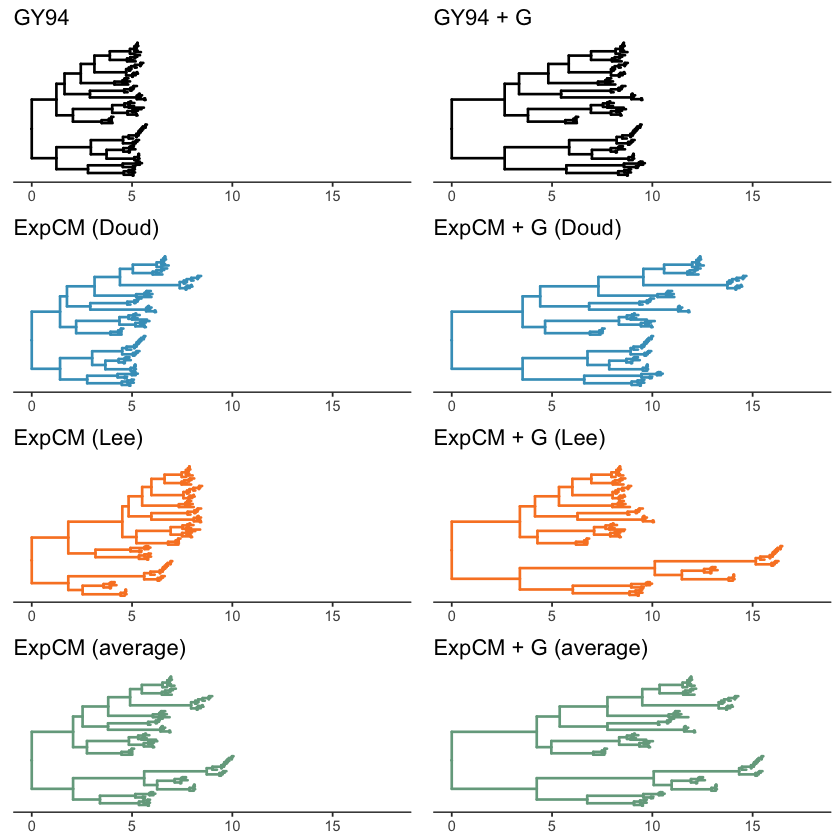

In [5]:
max_distance <- 18
YNGKP_M0 <- make_tree("_temp_hybrid_high_0_YNGKP_M0_tree_out.newick", "GY94", max_distance, black)
YNGKP_M5 <- make_tree("_temp_hybrid_high_0_YNGKP_M5_tree_out.newick", "GY94 + G", max_distance, black)

ExpCM_doud <- make_tree("_temp_hybrid_high_0_ExpCM_HA_hybridDoud_prefs_tree_out.newick", "ExpCM (Doud)", max_distance, blue)
ExpCM_average <- make_tree("_temp_hybrid_high_0_ExpCM_HA_average_prefs_tree_out.newick", "ExpCM (average)", max_distance, green)
ExpCM_lee <- make_tree("_temp_hybrid_high_0_ExpCM_HA_hybridLee_prefs_tree_out.newick", "ExpCM (Lee)", max_distance, orange)

ExpCM_doud_gammaomega <- make_tree("_temp_hybrid_high_0_ExpCM_HA_hybridDoud_prefs_gammaomega_tree_out.newick", "ExpCM + G (Doud)", max_distance, blue)
ExpCM_average_gammaomega <- make_tree("_temp_hybrid_high_0_ExpCM_HA_average_prefs_gammaomega_tree_out.newick", "ExpCM + G (average)", max_distance, green)
ExpCM_lee_gammaomega <- make_tree("_temp_hybrid_high_0_ExpCM_HA_hybridLee_prefs_gammaomega_tree_out.newick", "ExpCM + G (Lee)", max_distance, orange)

GY = arrangeGrob(YNGKP_M0, YNGKP_M5, ncol=2)
tree_doud = arrangeGrob(ExpCM_doud, ExpCM_doud_gammaomega, ncol=2)
tree_lee = arrangeGrob(ExpCM_lee, ExpCM_lee_gammaomega, ncol=2)
tree_average = arrangeGrob(ExpCM_average, ExpCM_average_gammaomega, ncol=2)

trees = plot_grid(GY, tree_doud, tree_lee, tree_average, ncol=1)
trees
ggsave("_temp_trees.png")

## Compete

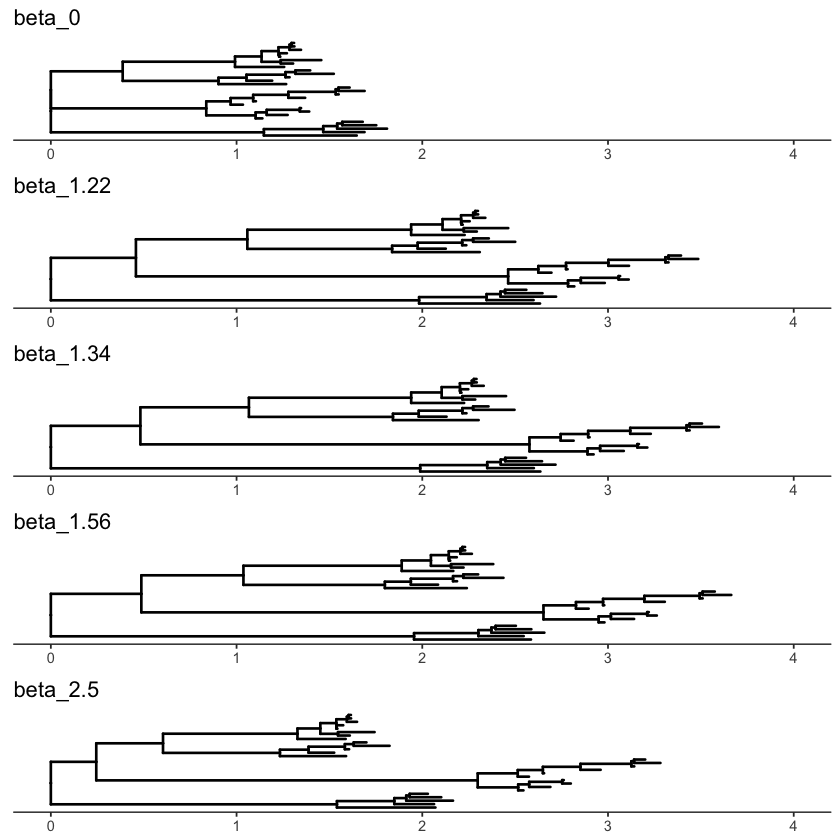

In [22]:
max_distance <- 4
beta_1.22 <- make_tree("_temp_1.22/_tree.newick", "beta_1.22", max_distance, black)
beta_1.34 <- make_tree("_temp_1.34/_tree.newick", "beta_1.34", max_distance, black)
beta_1.56 <- make_tree("_temp_1.56/_tree.newick", "beta_1.56", max_distance, black)
beta_1e_05 <- make_tree("_temp_1e-05/_tree.newick", "beta_0", max_distance, black)
beta_2.5 <- make_tree("_temp_2.5/_tree.newick", "beta_2.5", max_distance, black)

trees = plot_grid(beta_1e_05, beta_1.22, beta_1.34, beta_1.56, beta_2.5, ncol=1)
trees

## Compete (3)

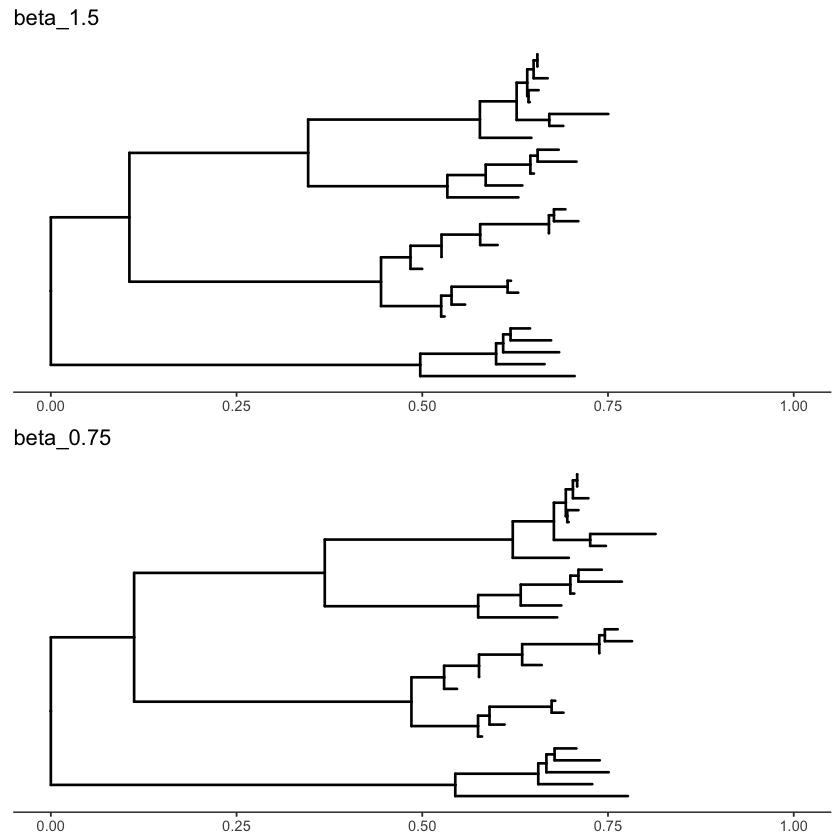

In [20]:
max_distance <- 1
beta_1.5 <- make_tree("_temp_1.5_simulate/_tree.newick", "beta_1.5", max_distance, black)
beta_0.75 <- make_tree("_temp_0.75_simulate/_tree.newick", "beta_0.75", max_distance, black)


trees = plot_grid(beta_1.5, beta_0.75, ncol=1)
trees